# Epilepsy Prediction

In [1]:
import pyedflib

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
%matplotlib inline

#### Summary of data

Dataset for this exploratory data analysis is from Children’s Hospital Boston and contains 24 cases of children who have epilepsy. For this analysis we are only looking at one patient “chb03”and one EEG reading. The details of the file we analyzed are:

- File Name: chb01_03.edf
- File Start Time: 13:43:04
- File End Time: 14:43:04
- Number of Seizures in File: 1
- Seizure Start Time: 2996 seconds
- Seizure End Time: 3036 seconds


Channels in EDF Files:
- Channel 1: FP1-F7
- Channel 2: F7-T7
- Channel 3: T7-P7
- Channel 4: P7-O1
- Channel 5: FP1-F3
- Channel 6: F3-C3
- Channel 7: C3-P3
- Channel 8: P3-O1
- Channel 9: FP2-F4
- Channel 10: F4-C4
- Channel 11: C4-P4
- Channel 12: P4-O2
- Channel 13: FP2-F8
- Channel 14: F8-T8
- Channel 15: T8-P8
- Channel 16: P8-O2
- Channel 17: FZ-CZ
- Channel 18: CZ-PZ
- Channel 19: P7-T7
- Channel 20: T7-FT9
- Channel 21: FT9-FT10
- Channel 22: FT10-T8
- Channel 23: T8-P8

Data Sampling Rate: 256 Hz

The signals were sampled at 256 samples per second so for 60 minutes of signal readings we have 921,600 readings for each channel. We visualized the raw data of all the signals and also the summarized signal reading to a per second average reading. We marked the regions where seizures occurred and can see how the EEG signals show spikes in that timeframe.


In [4]:
# Load EEG data for dataset 3
eeg_file = pyedflib.EdfReader("data/chb01_03.edf")
no_of_signals = eeg_file.signals_in_file
signal_labels = eeg_file.getSignalLabels()

In [5]:
# Extract the EEG signal data into a python array
sigbufs = np.zeros((no_of_signals, eeg_file.getNSamples()[0]))
for i in np.arange(no_of_signals):
    sigbufs[i, :] = eeg_file.readSignal(i)

# Clear the memory by removing the eeg file we read into memory
eeg_file._close()
del eeg_file

In [7]:
# Summarize our dataset
print "Shape of our singal data array:" , sigbufs.shape
print "Number of signals(Channels): " , no_of_signals
print "Signal/Channel Labels:"
print signal_labels

Shape of our singal data array: (23, 921600)
Number of signals(Channels):  23
Signal/Channel Labels:
[u'FP1-F7', u'F7-T7', u'T7-P7', u'P7-O1', u'FP1-F3', u'F3-C3', u'C3-P3', u'P3-O1', u'FP2-F4', u'F4-C4', u'C4-P4', u'P4-O2', u'FP2-F8', u'F8-T8', u'T8-P8', u'P8-O2', u'FZ-CZ', u'CZ-PZ', u'P7-T7', u'T7-FT9', u'FT9-FT10', u'FT10-T8', u'T8-P8']


In [15]:
# Load the EEG data into dataframe
eeg_df = pd.DataFrame(data=sigbufs.transpose(),columns=signal_labels)
eeg_df.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
0,-17.777778,39.267399,-3.711844,8.400488,-0.586081,4.102564,37.704518,-15.042735,-17.387057,-45.128205,...,-106.862027,-59.97558,180.317460,-18.559219,85.372405,4.102564,20.903541,-9.181929,-39.65812,-59.97558
1,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.19536,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.19536
2,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.19536,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.19536
3,0.586081,0.195360,0.195360,0.195360,0.195360,0.195360,0.586081,-0.195360,0.195360,0.586081,...,-0.976801,0.19536,2.148962,0.586081,0.586081,0.195360,1.367521,-0.195360,-0.19536,0.19536
4,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.19536,2.148962,0.195360,0.195360,0.195360,-0.195360,0.195360,0.19536,0.19536


In [10]:
print "Shape of EEG DF:" , eeg_df.shape
row_count = eeg_df.shape[0]

Shape of EEG DF: (921600, 23)


In [11]:
# Describe the data
eeg_df.describe()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
count,921600.000000,921600.000000,921600.000000,921600.000000,921600.000000,921600.000000,921600.000000,921600.000000,921600.000000,921600.000000,...,921600.000000,921600.000000,921600.000000,921600.000000,921600.000000,921600.000000,921600.000000,921600.000000,921600.000000,921600.000000
mean,0.179297,0.169967,0.211526,0.212904,0.191500,0.178069,0.205915,0.202724,0.195028,0.178507,...,0.207375,0.195459,0.187872,0.177643,0.210702,0.179194,0.194553,0.221789,0.215459,0.195459
std,40.714261,32.894312,39.951937,33.216016,47.113506,47.234020,34.301307,42.481846,45.950161,46.201914,...,39.765019,46.414002,49.791142,55.202184,50.496161,39.951937,24.620918,48.208360,25.459858,46.414002
min,-480.000000,-281.904762,-313.943834,-205.714286,-513.211233,-431.159951,-316.678877,-386.227106,-536.263736,-554.236874,...,-547.203907,-721.074481,-378.412698,-540.170940,-491.721612,-309.255189,-226.031746,-512.429792,-289.328449,-721.074481
25%,-18.168498,-16.605617,-19.731380,-17.387057,-23.638584,-24.029304,-18.168498,-22.466422,-22.857143,-22.075702,...,-20.122100,-21.294261,-26.373626,-27.155067,-27.545788,-19.340659,-13.479853,-23.638584,-12.698413,-21.294261
50%,0.586081,0.586081,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.586081,...,0.195360,0.195360,0.195360,0.586081,-0.195360,0.195360,0.586081,-0.195360,0.195360,0.195360
75%,18.949939,17.387057,19.731380,17.777778,24.029304,25.592186,18.168498,22.857143,22.857143,23.247863,...,20.512821,21.684982,26.764347,28.327228,27.155067,20.122100,14.261294,23.638584,12.698413,21.684982
max,499.536020,305.738706,309.645910,198.681319,556.581197,349.499389,363.174603,343.247863,451.477411,395.213675,...,481.953602,476.483516,479.609280,595.262515,469.450549,314.334554,317.069597,485.470085,500.317460,476.483516


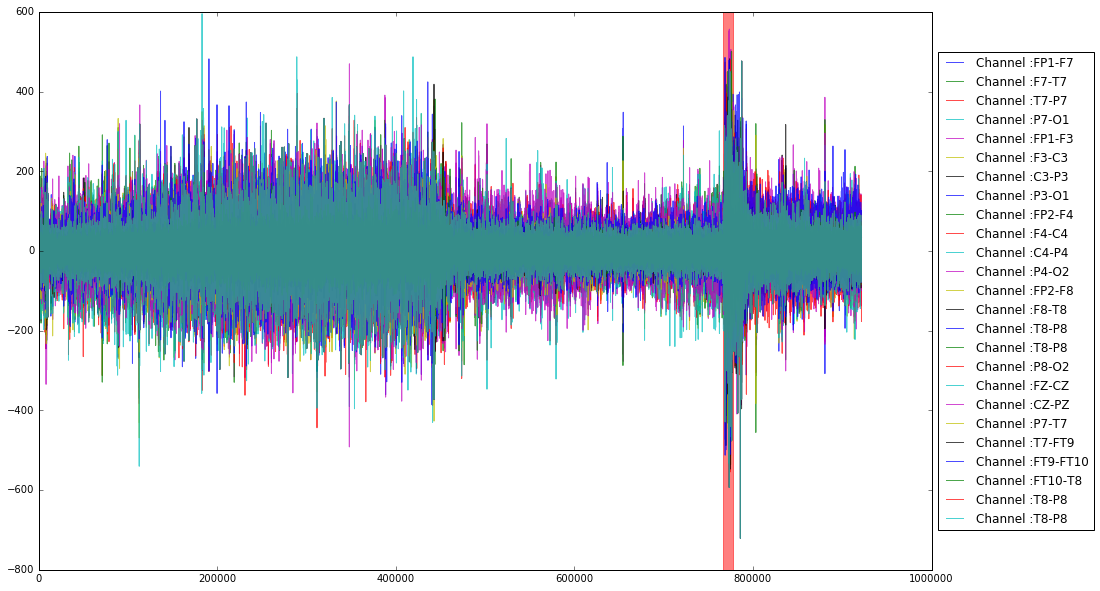

In [17]:
# Visualize using all the data for all channels
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
for column in eeg_df.columns:
    ax.plot(range(row_count), eeg_df[column].values,label='Channel :'+column,alpha=0.7)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Signals where seizures occured
ax.axvspan(2996*256, 3036*256, alpha=0.5, color='red')

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

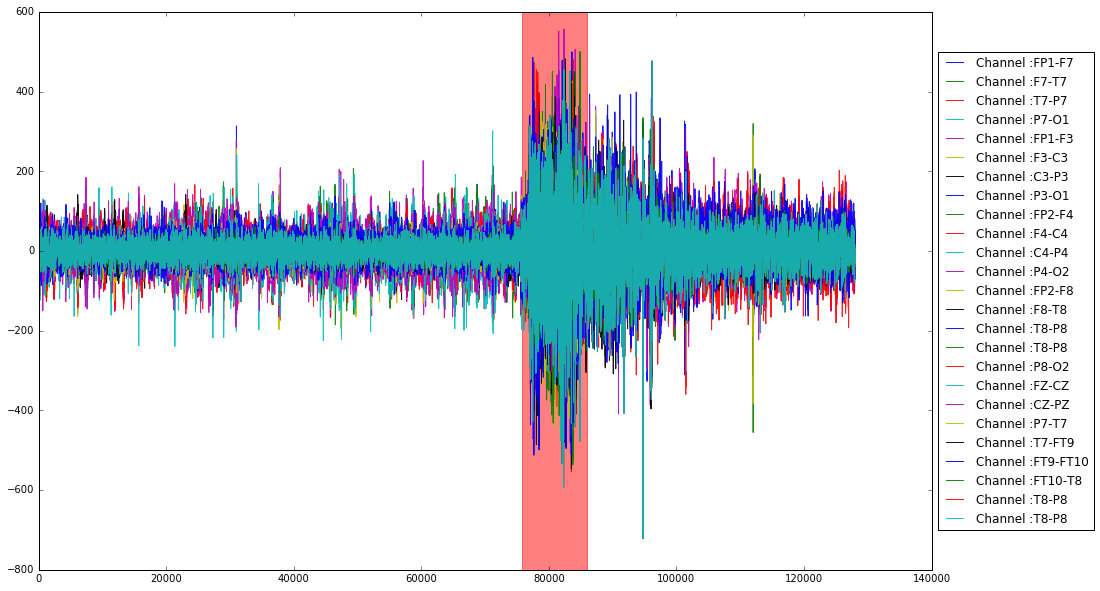

In [44]:
# Visualize using the data for all channels close to seizures

subset_eeg_df = eeg_df.iloc[2700*256:3200*256,:]
row_count = subset_eeg_df.shape[0]

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
for column in subset_eeg_df.columns:
    ax.plot(range(row_count), subset_eeg_df[column].values,label='Channel :'+column,alpha=0.9)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Signals where seizures occured
ax.axvspan((2996-2700)*256, (3036-2700)*256, alpha=0.5, color='red')

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

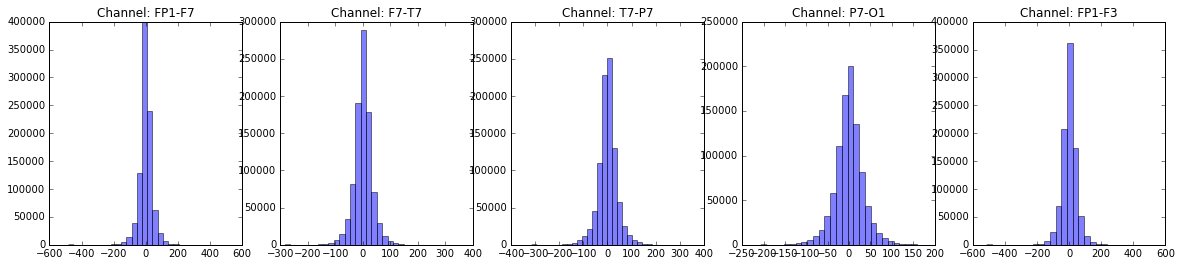

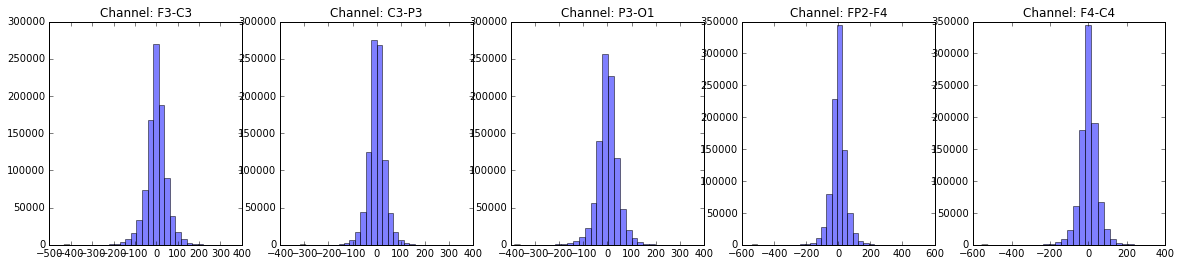

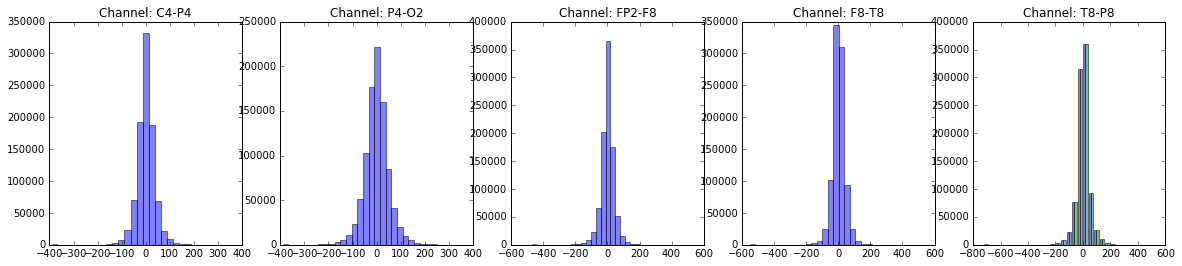

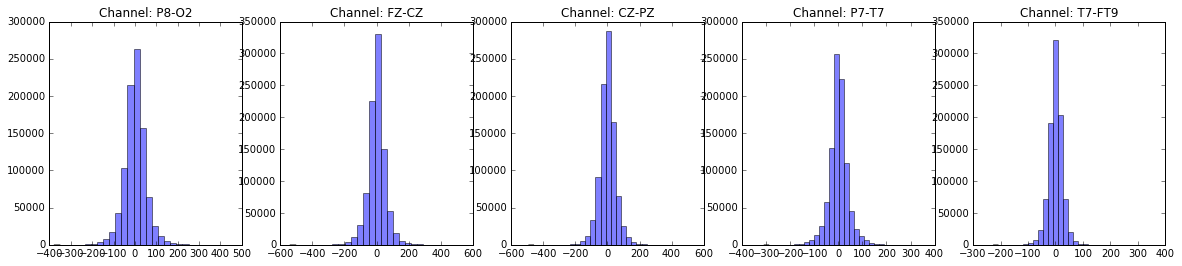

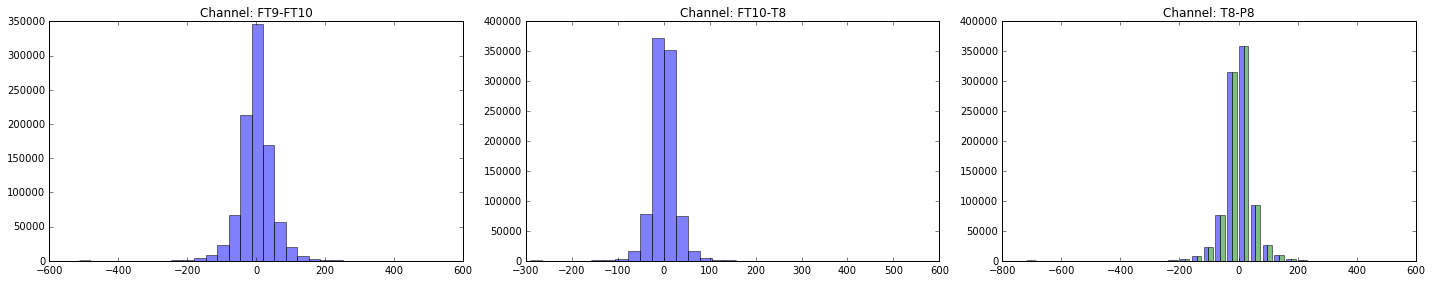

In [36]:
# Plot histograms of all the channels data

fig, ax = plt.subplots(1, 5, figsize=(20, 4))
idx =0
for column in eeg_df.columns[:5]:
    ax[idx].hist(eeg_df[column].values, bins=30, alpha=0.5)
    ax[idx].set_title('Channel: '+column)
    idx = idx +1

fig, ax = plt.subplots(1, 5, figsize=(20, 4))
idx =0
for column in eeg_df.columns[5:10]:
    ax[idx].hist(eeg_df[column].values, bins=30, alpha=0.5)
    ax[idx].set_title('Channel: '+column)
    idx = idx +1

fig, ax = plt.subplots(1, 5, figsize=(20, 4))
idx =0
for column in eeg_df.columns[10:15]:
    ax[idx].hist(eeg_df[column].values, bins=30, alpha=0.5)
    ax[idx].set_title('Channel: '+column)
    idx = idx +1

fig, ax = plt.subplots(1, 5, figsize=(20, 4))
idx =0
for column in eeg_df.columns[15:20]:
    ax[idx].hist(eeg_df[column].values, bins=30, alpha=0.5)
    ax[idx].set_title('Channel: '+column)
    idx = idx +1

fig, ax = plt.subplots(1, 3, figsize=(20, 4))
idx =0
for column in eeg_df.columns[20:24]:
    ax[idx].hist(eeg_df[column].values, bins=30, alpha=0.5)
    ax[idx].set_title('Channel: '+column)
    idx = idx +1
    
plt.tight_layout()
plt.show() 

In [62]:
# The signals are sampled at 256 samples per second. 
# So let us average the samples to get one reading per second

row_count = eeg_df.shape[0]
summary_eeg = []

for i in range(0,row_count,255):
    summary = eeg_df.iloc[i:i+255,:].mean(axis=0)
    summary_eeg.append(summary)

summary_eeg_df = pd.DataFrame(np.asarray(summary_eeg), columns=eeg_df.columns)
print "Summarized signal data shape: " , summary_eeg_df.shape
summary_eeg_df.head()

Summarized signal data shape:  (3615, 23)


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
0,-10.081352,-9.549666,-3.840552,-1.781225,-0.095765,-11.008355,-11.438914,-2.614762,5.100050,-6.751802,...,9.794824,-1.243410,-20.198712,-6.878977,-17.299720,4.231272,-3.120400,2.060092,8.811128,-1.243410
1,10.801504,10.767794,3.966195,-0.555436,-0.878738,12.088582,5.893749,8.429601,-1.522277,8.820321,...,3.455960,3.135723,-1.275587,6.521966,3.661280,-3.575475,-1.479375,-2.803227,-0.104958,3.135723
2,-3.478944,-2.418636,-5.109244,-0.860351,-0.463502,5.188920,-5.311499,-11.860279,-0.368503,-1.998803,...,-2.973306,-3.158706,-5.512222,2.495248,2.513635,5.499964,-1.580502,5.755848,0.843496,-3.158706
3,3.983050,3.944744,8.147669,8.521535,-0.687208,1.955900,7.367761,16.366588,-6.681319,6.292131,...,7.262036,10.185544,12.241806,2.142833,6.143504,-7.756949,3.224592,-7.900979,-0.812852,10.185544
4,1.309296,-4.355383,-2.415571,-5.190452,1.146879,-4.330867,1.205104,-8.890804,11.000694,2.916613,...,-3.269027,-2.996289,-2.706696,7.565419,-9.151284,2.806292,1.623405,2.300654,-0.005363,-2.996289


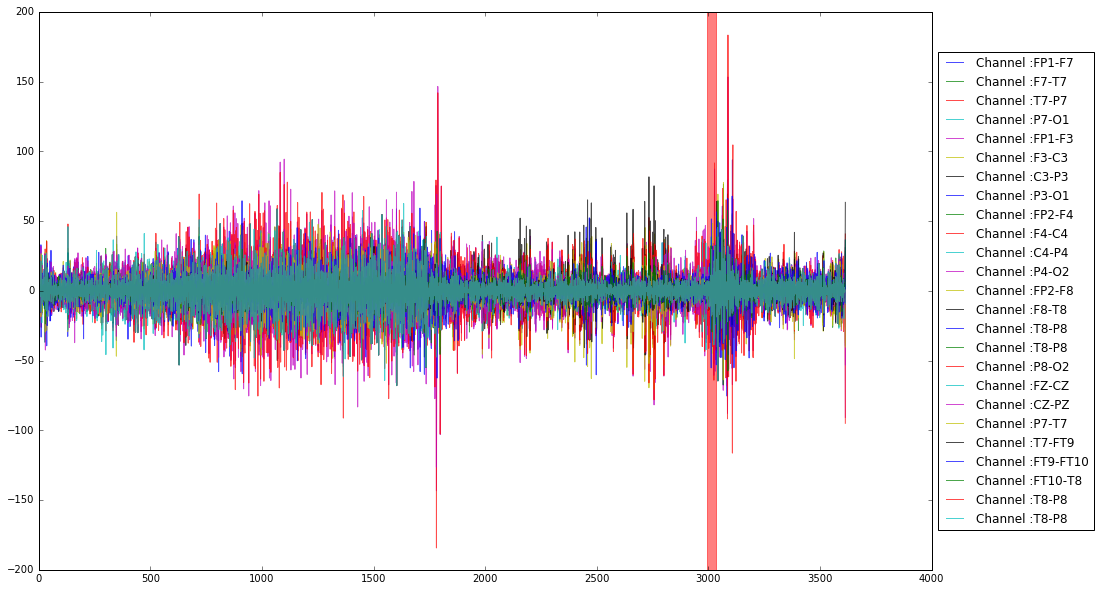

In [66]:
# Visualize using summarized data for all channels
row_count = summary_eeg_df.shape[0]
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
for column in summary_eeg_df.columns:
    ax.plot(range(row_count), summary_eeg_df[column].values,label='Channel :'+column,alpha=0.7)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Signals where seizures occured
ax.axvspan(2996, 3036, alpha=0.5, color='red')

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()